## Import Libraries

In this notebook, we will use several libraries to perform data analysis and visualization. Below are the libraries we have imported:

- `matplotlib.pyplot` for plotting graphs.
- `scipy.io` for loading MATLAB files.
- `numpy` for numerical operations.
- `repasca` for performing ASCA (Analysis of Variance - Simultaneous Component Analysis).

These libraries are essential for loading the data, performing the analysis, and visualizing the results.

In [1]:
from matplotlib import pyplot as plt
import scipy.io
import numpy as np
from repasca import rep_asca

## Load Data

In this section, we will load the data from a MATLAB file using the `scipy.io` library. The data will be extracted into variables that will be used for further analysis. The key variables extracted are:

- `X`: The main data matrix.
- `design`: The design matrix.
- `X_rep`: The replicated data matrix.
- `d_rep`: The replicated design matrix.
- `klimit`: A scalar value representing the limit for the number of components.
- `lbd`: The wavelength values.

We will then use these variables to perform ASCA (Analysis of Variance - Simultaneous Component Analysis) using the `rep_asca` function from the `repasca` library.

In [2]:
data = scipy.io.loadmat('data.mat')

# Extraire les variables nécessaires
X = data['X']
design = data['d']
X_rep = data['X_rep']
d_rep = data['Ds']
klimit = data['klimit'][0][0]  # Assurez-vous que klimit est un scalaire
lbd = data['lambda']


## Launch Model RepASCA

In this section, we will launch the RepASCA model using the variables extracted from the MATLAB file. The `rep_asca` function from the `repasca` library will be used to perform the analysis. The key steps involved are:

1. Call the `rep_asca` function with the extracted variables.
2. Display the results, including explained variance, list of factor names, and L_err.
3. Plot the results to visualize the L_err against the wavelength.

The following cell contains the code to perform these steps.

In [3]:
# Appeler la fonction rep_asca
model = rep_asca(X, design, X_rep, d_rep, klimit)


## Plot Results

In this section, we will display and plot the results obtained from the RepASCA model. The key outputs include:

- Explained Variance
- List of Factor Names
- L_err

We will also plot the L_err against the wavelength to visualize the results.

Explained Variance: [[1.08993540e-29 2.77543750e+00 1.12922713e-29 9.72245625e+01]
 [1.07729291e-29 2.77399866e+00 1.11105667e-29 9.72260013e+01]
 [1.28306825e-29 2.77402201e+00 1.12192185e-29 9.72259780e+01]
 [1.08335199e-29 2.77323967e+00 1.10490011e-29 9.72267603e+01]
 [1.13262291e-29 2.77395033e+00 1.15810978e-29 9.72260497e+01]
 [1.36628283e-29 2.77093629e+00 1.15906743e-29 9.72290637e+01]
 [1.01597369e-29 2.76629464e+00 1.12988988e-29 9.72337054e+01]
 [1.06556797e-29 2.76353241e+00 1.10001242e-29 9.72364676e+01]
 [1.44453357e-29 2.69995001e+00 1.10930103e-29 9.73000500e+01]
 [1.51775593e-29 2.73684705e+00 1.11767953e-29 9.72631529e+01]
 [6.14542153e-31 5.35529596e+00 2.36384454e-29 9.46447040e+01]]
List of Factor Names: ['XA', 'XB', 'XAB', 'XRes']
L_err: [[-0.10528237 -0.09518142 -0.08359936 ... -0.06495071  0.11918162
  -0.13157145]
 [ 0.21132056  0.20744864  0.2017333  ... -0.06947404 -0.05927514
   0.16049637]
 [ 0.09209141  0.10255831  0.10786044 ...  0.08848877  0.1254921
  

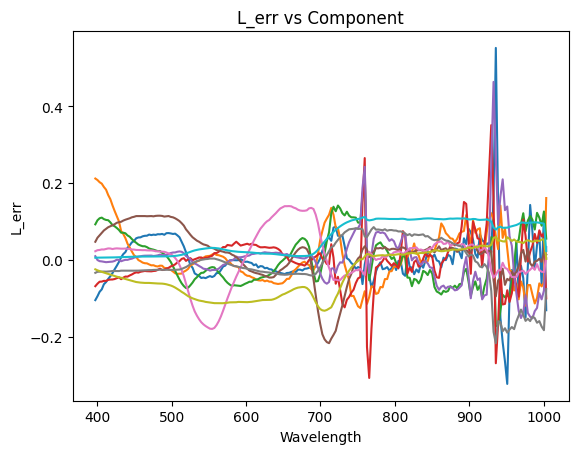

In [4]:
print("Explained Variance:", model['explained_var'])
print("List of Factor Names:", model['list_factor_name'])
print("L_err:", model['L_err'])

plt.plot(lbd,model['L_err'].T)
plt.xlabel('Wavelength')
plt.ylabel('L_err')
plt.title('L_err vs Component')
plt.show()